# Handle Multiple Legends in a Multiline plot

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import load_data as ld

This is to load all the data per provinces, regions and country. The rows represent the different times (79 for italy) and (79*21= 1659) per regions and so on. 

In [2]:
# Load all data
ap, ar, ac = ld.load_months_data('*')
print('All provinces entries {}'.format(ap.shape))
print('All regions entries {}'.format(ar.shape))
print('Italy entries {}'.format(ac.shape))

All provinces entries (10112, 12)
All regions entries (1659, 20)
Italy entries (79, 16)


## Transform an object type into a datetime type

In [3]:
# Add a check on the data object to transform it into a datetime
if (ap['data'].dtype == np.object):
   ap['data'] = pd.to_datetime(ap['data'])
if (ar['data'].dtype == np.object):
   ar['data'] = pd.to_datetime(ar['data'])
if (ac['data'].dtype == np.object):
   ac['data'] = pd.to_datetime(ac['data'])

In [4]:
ap.dtypes

data                       datetime64[ns]
stato                              object
codice_regione                      int64
denominazione_regione              object
codice_provincia                    int64
denominazione_provincia            object
sigla_provincia                    object
lat                               float64
long                              float64
totale_casi                         int64
note_it                            object
note_en                            object
dtype: object

## Plot date vs total cases

In [5]:
ap_total_date = ap.groupby(['data']).agg({'totale_casi':[sum]})
# Use ravel() to keep the original column name
ap_total_date.columns = ["_".join(x) for x in ap_total_date.columns.ravel()]

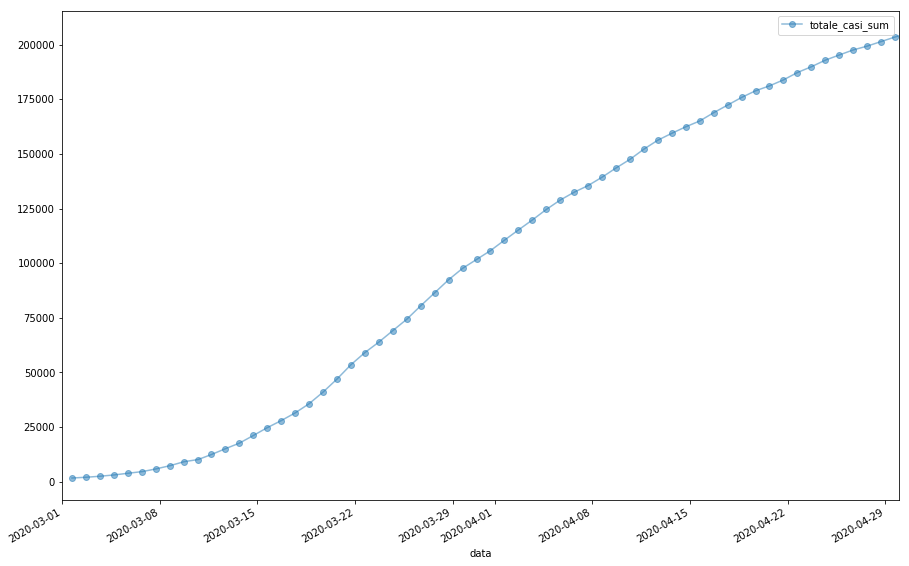

In [6]:
# Set figure size 
fig, ax = plt.subplots(figsize=(15,10))
ap_total_date.loc['2020-03':'2020-04'].plot(ax=ax,
                                            marker='o', 
                                            alpha=0.5, 
                                            linestyle= '-',
                                            xlim=['2020-03-01','2020-04-30'])
plt.show()

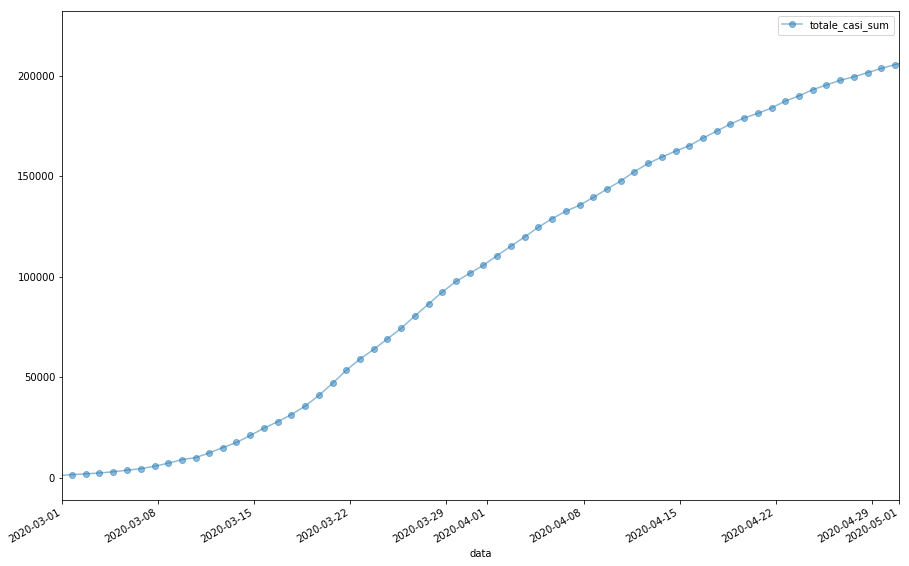

In [7]:
# Set figure size
fig, ax = plt.subplots(figsize=(15,10))

ap_total_date.plot(ax=ax,
                                            marker='o', 
                                            alpha=0.5, 
                                            linestyle= '-',
                                            xlim=['2020-03-01','2020-05-01'])
plt.show()

## Handle Multiple Legends 

In [8]:
ap_total_date_provinces = ap.groupby(['data','denominazione_provincia']).agg({'totale_casi':[sum]})
ap_total_date_provinces.columns = ["_".join(x) for x in ap_total_date_provinces.columns.ravel()]

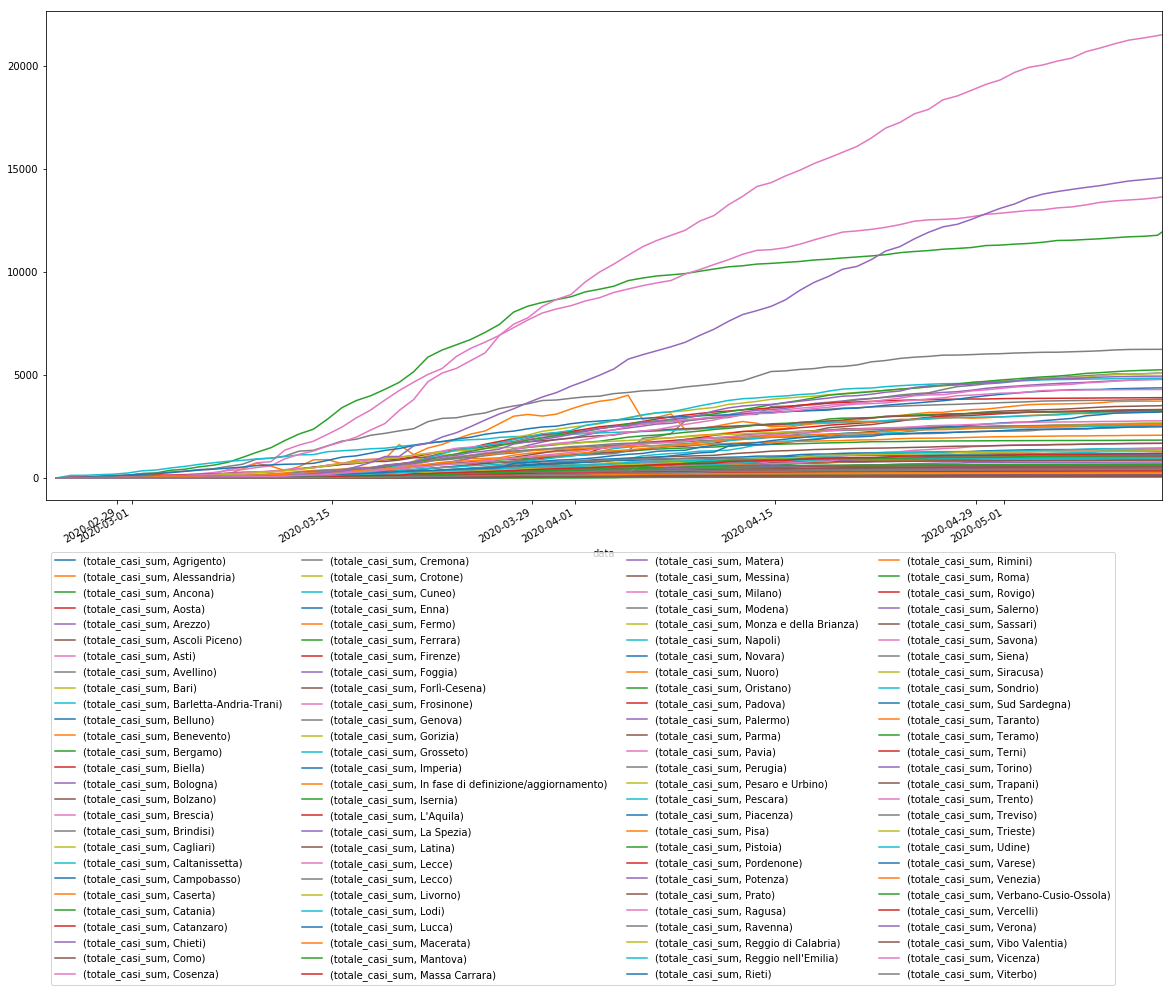

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ap_total_date_provinces.unstack().plot(ax=ax,
                       xlim=['2020-02-24','2020-05-12'])
# Use bbox to anchor
plt.legend(bbox_to_anchor=(0,-1),loc='lower left',ncol=4)
plt.show()

In [10]:
ar_total_date_regions = ar.groupby(['data','denominazione_regione']).agg({'totale_casi':[sum]})
ar_total_date_regions.columns = ["_".join(x) for x in ar_total_date_regions.columns.ravel()]

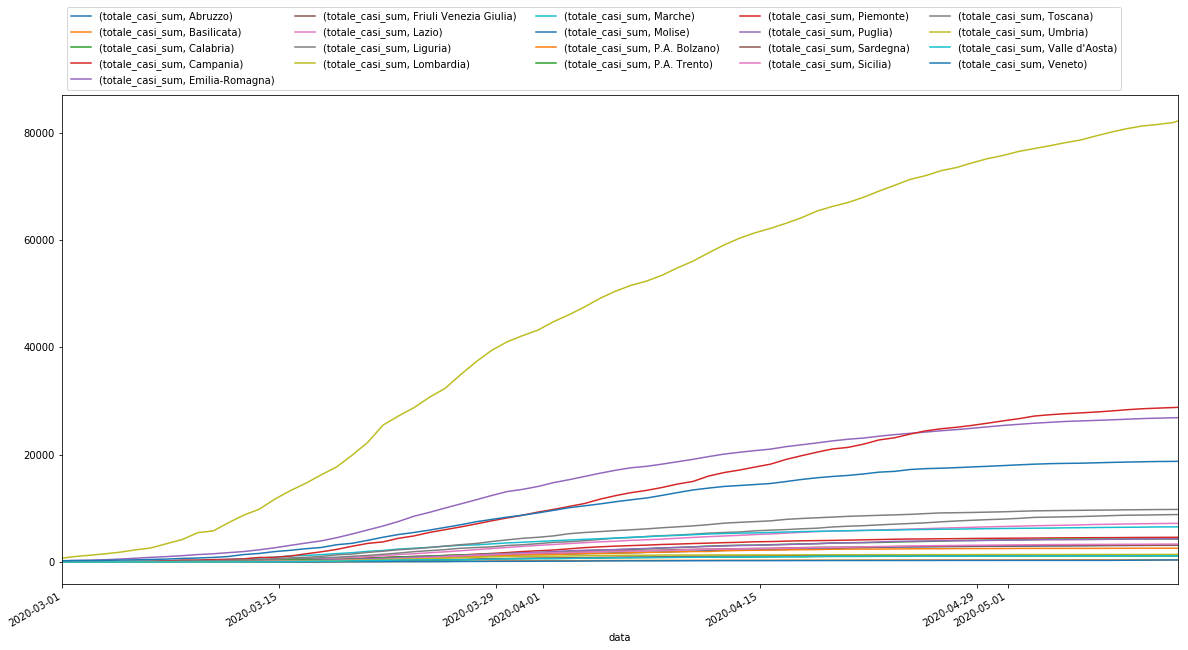

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ar_total_date_regions.unstack().plot(ax=ax,
                       xlim=['2020-03-01','2020-05-12'])
plt.legend(bbox_to_anchor=(0,1),loc='lower left',ncol=5)
plt.show()